## Module 2

Module 2 is built with LightGBM algorithm.
It covers the data preprocessing, training, parameter tunning and result for LightGBM



In [0]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import normalize
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,f1_score, recall_score,roc_curve, auc
from sklearn.metrics import accuracy_score,precision_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import json
import csv
import time 

In [0]:
!pip install lightgbm --install-option=--gpu

/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py:244: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)


In [0]:
import lightgbm as lgb

In [0]:
def gen_csv(test_id,true_values, name):
    soln = pd.DataFrame( true_values, test_id,columns = ["target"])
    print(soln.head(5))
    soln.to_csv(name + ".csv",index_label = ["ID_code"])
    print("-------------Done-----------------")
    

In [0]:
file1 = "https://drive.google.com/open?id=1PI8qVYbbbZUFlbXFduL4gkAVCFl6BW1U"
file2 = "https://drive.google.com/open?id=1in58RJdqcZc-RxxkhgV2n6JGjbiEVyGf"

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link_text = file1 # The shareable link
fluff, id_1 = link_text.split('=')
print (id_1)

link_text = file2 # The shareable link
fluff, id_2 = link_text.split('=')
print (id_2)

downloaded = drive.CreateFile({'id':id_1}) 
downloaded.GetContentFile("train.csv")
downloaded = drive.CreateFile({'id':id_2}) 
downloaded.GetContentFile("test.csv")  

     |████████████████████████████████| 993kB 34.7MB/s 
1PI8qVYbbbZUFlbXFduL4gkAVCFl6BW1U
1in58RJdqcZc-RxxkhgV2n6JGjbiEVyGf


In [0]:
df = pd.read_csv("train.csv")

In [0]:
test_df = pd.read_csv("test.csv")
test_id = np.array(test_df.iloc[:,0])

In [0]:
df.head(5)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [0]:
test_df.head(5)

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [0]:
df.duplicated().sum()

0

In [0]:
df.isnull().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
var_3      0
var_4      0
var_5      0
var_6      0
var_7      0
var_8      0
var_9      0
var_10     0
var_11     0
var_12     0
var_13     0
var_14     0
var_15     0
var_16     0
var_17     0
var_18     0
var_19     0
var_20     0
var_21     0
var_22     0
var_23     0
var_24     0
var_25     0
var_26     0
var_27     0
          ..
var_170    0
var_171    0
var_172    0
var_173    0
var_174    0
var_175    0
var_176    0
var_177    0
var_178    0
var_179    0
var_180    0
var_181    0
var_182    0
var_183    0
var_184    0
var_185    0
var_186    0
var_187    0
var_188    0
var_189    0
var_190    0
var_191    0
var_192    0
var_193    0
var_194    0
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

In [0]:
def add_feature(df, cols):

    df['sum'] = df[cols].sum(axis=1)  
    df['min'] = df[cols].min(axis=1)
    df['max'] = df[cols].max(axis=1)
    df['mean'] = df[cols].mean(axis=1)
    
    df['std'] = df[cols].std(axis=1)
    df['skew'] = df[cols].skew(axis=1)
    df['kurt'] = df[cols].kurtosis(axis=1)
    df['med'] = df[cols].median(axis=1)


In [0]:
x_col = df.iloc[:,2:]

In [0]:
x_col.head(5)

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [0]:
add_feature(x_col , x_col.columns)

In [0]:
x_col.head(5)

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_198,var_199,sum,min,max,mean,std,skew,kurt,med
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,12.7803,-1.0914,1456.3182,-21.4494,43.1127,7.281591,9.331540,0.101580,1.331023,6.77040
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,18.3560,1.9518,1415.3636,-47.3797,40.5632,7.076818,10.336130,-0.351734,4.110215,7.22315
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,14.7222,0.3965,1240.8966,-22.4038,33.8820,6.204483,8.753387,-0.056957,0.546438,5.89940
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,17.9697,-8.9996,1288.2319,-35.1659,38.1015,6.441159,9.594064,-0.480116,2.630499,6.70260
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,17.9974,-8.8104,1354.2310,-65.4863,41.1037,6.771155,11.287122,-1.463426,9.787399,6.94735


In [0]:
# scaler = MinMaxScaler()
scaler = StandardScaler()
features = scaler.fit_transform(x_col)

# features = x_col

In [0]:
features.shape

(200000, 208)

In [0]:
target = df["target"]

In [0]:
target.head(5)

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [0]:
def encode_data(data):
  la_enc = LabelEncoder()
  enc_target = la_enc.fit_transform(data)
  target_final = to_categorical(enc_target)
  return target_final

In [0]:
x_train,x_test,y_train,y_test = train_test_split(features,target , test_size = 0.2, random_state = 42)

In [0]:
# x_train.shape

(160000, 200)

In [0]:
# y_train.shape

(160000, 2)

### LightGBM 

In [0]:
results_lgb = {}

In [0]:
x_train,x_test,y_train,y_test = train_test_split(features,target , test_size = 0.2, random_state = 140)

In [0]:
bag_freq = [8,16,20, 20]
baggin_frac = [0.3, 0.1, 0.4 , 0.5]
learn_rate = [0.01, 0.001, 0.05, 0.01 ]
mx_depth = [2 ,4, 6, 6]
num_leaves = [2,4,8 ,8]

st = time.time()
for k in range(4):
  params = {"learning_rate" : learn_rate[k],
            "bagging_freq" : bag_freq[k],
            "bagging_fraction" : baggin_frac[k],
            "application" : "binary",
            "boost" : "gbdt",
            "max_depth" : mx_depth[k],
            "metric" : "auc",
            "num_leaves" : num_leaves[k],
            "verbosity" : 1,
            "num_threads" : 4,
            "num_boost_round": 50000
   }

#   y_train = encode_data(y_train)
#   y_test = encode_data(y_test)
#   print(y_train[:5])

  d_train = lgb.Dataset(x_train, label=y_train)
  validation_data = lgb.Dataset(x_test, label=y_test)

  clf_lgb = lgb.train(params, d_train , verbose_eval=0, valid_sets=[d_train, validation_data], early_stopping_rounds = 200)
  clf_lgb.save_model('lightgbm_model.txt', num_iteration=clf_lgb.best_iteration)

  try:    
    pickle.dump(clf_lgb,open("best_model__{}.sav".format(k), "wb"))
  
  except:
    print("pickle exception")

  end_time = time.time() - st

  pred = clf_lgb.predict(x_test)

  try: 
    prediction = pred
    for i, val in enumerate(pred):
      if val <= 0.5:
        prediction[i] = 0
      else:
        prediction[i] = 1
#     predictions[:5]

    extra_scores = {  "learning_rate" : learn_rate[k],
                    "bagging_freq" : bag_freq[k],
                    "bagging_fraction" : baggin_frac[k],
                    "max_depth" : mx_depth[k],
                    "num_leaves" :num_leaves[k],
                    "Training time (sec)": end_time,
                    "F1_Score" : f1_score(y_test,prediction, average = "weighted"),
                    "Recall_score" : recall_score(y_test, prediction, average = "weighted"),
                    "Precision_score" : recall_score(y_test,prediction, average = "weighted"),
                    "Accuracy Score" : accuracy_score(y_test, pred)
     }
  results_lgb["model_no_{}".format(k)] = extra_scores             
  except Exception as e:
    print("exception", e)

lgb_result = pd.DataFrame(results_lgb)

In [0]:
lgb_result

,model_no_0,model_no_1,model_no_2,model_no_3
Accuracy Score,0.921075,0.91900,0.922975,0.92300
F1_Score,0.902321,0.89815,0.909931,0.90826
Precision_score,0.921075,0.91900,0.922975,0.92300
Recall_score,0.921075,0.91900,0.922975,0.92300
Training time (sec),1528.000000,1427.00000,132.000000,553.00000
bagging_fraction,0.300000,0.10000,0.400000,0.50000
bagging_freq,8.000000,16.00000,20.000000,20.00000
learning_rate,0.010000,0.00100,0.050000,0.01000
max_depth,2.000000,4.00000,6.000000,6.00000
num_leaves,2.000000,4.00000,8.000000,8.00000


In [0]:
print(round(1528/3600,2), "hours for best model training time")

0.42 hours for best model training time


In [0]:
lgb_result.to_csv("LGB_all_model_result.csv")

### Feature importance

In [0]:
clf_lgb = pickle.load(open("best_model__3.sav","rb"))

In [0]:
pred = clf_lgb.predict(x_test)

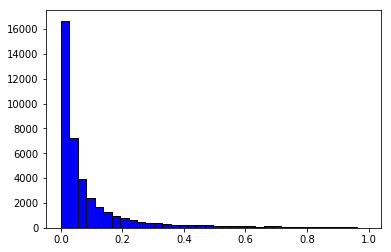

In [0]:
plt.hist(pred, color = 'blue', edgecolor = 'black',
         bins = int(180/5))
plt.show()

In [0]:
pred[:15]

array([0.00474617, 0.07813392, 0.02007756, 0.02151439, 0.56034761,
       0.08951867, 0.00273119, 0.29876483, 0.02898571, 0.00577267,
       0.11007194, 0.022895  , 0.18409134, 0.06602998, 0.02426308])

In [0]:
l = clf_lgb.feature_importance()
imp_features = []
for i in l:
  imp_features.append(i)
imp_features[:5]

[350, 351, 356, 100, 113]

In [0]:
import itertools
feature_imp = pd.DataFrame(sorted(zip(imp_features,x_col.columns)),
                           columns = ["Value", "Feature"])

In [0]:
# feature_imp.to_csv("imporatant_features_of_model_0.csv")
feature_imp = pd.read_csv("imporatant_features_of_model_0.csv")

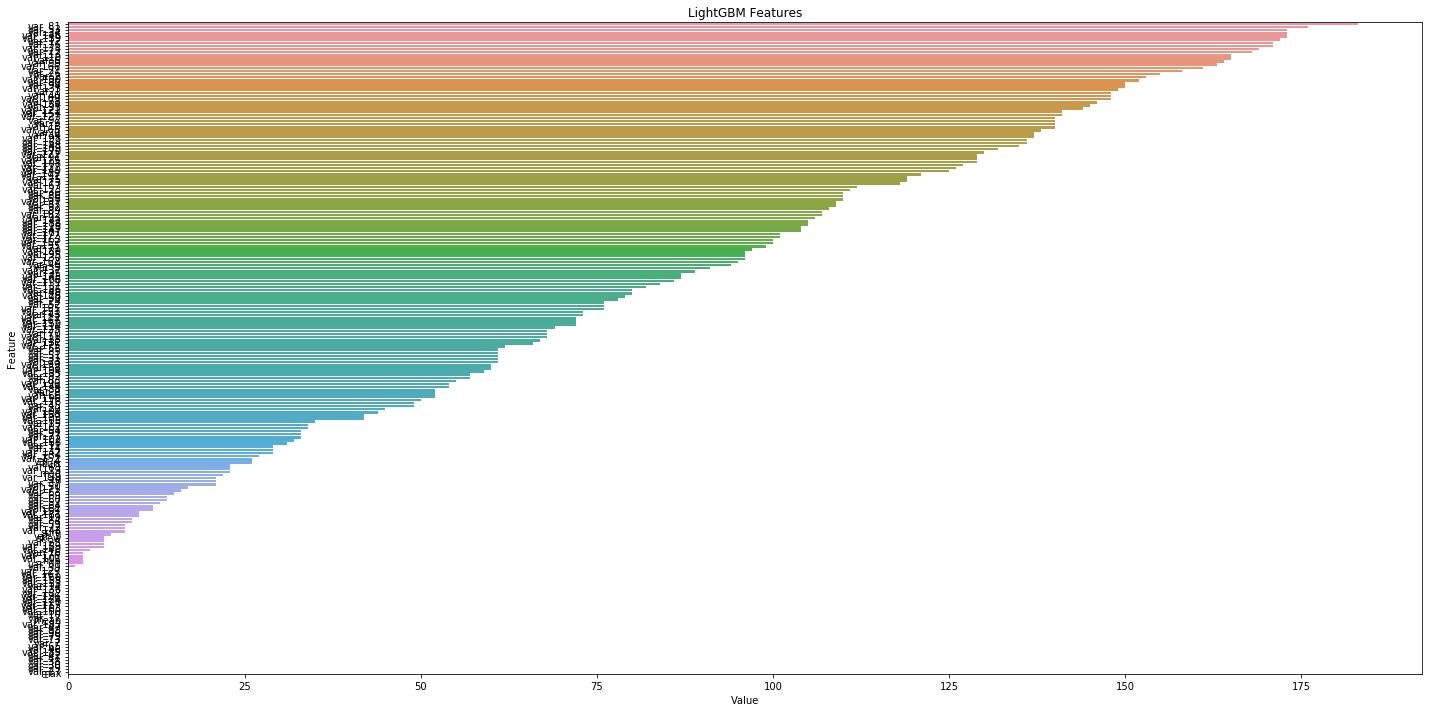

<Figure size 432x288 with 0 Axes>

In [0]:
# !pip install seaborn


plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')

Text(0.5, 15.0, 'Predicted label')

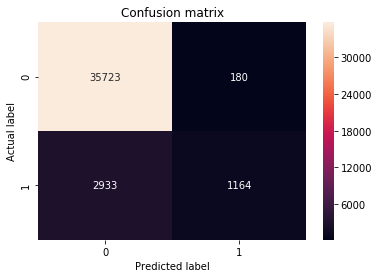

In [0]:
cnf_matrix = confusion_matrix(y_test, best_preds)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [0]:
select_important_features = feature_imp[(feature_imp["Value"] > 5)]
imp_feat_columns = select_important_features["Feature"].values
imp_feat_columns.shape

(164,)

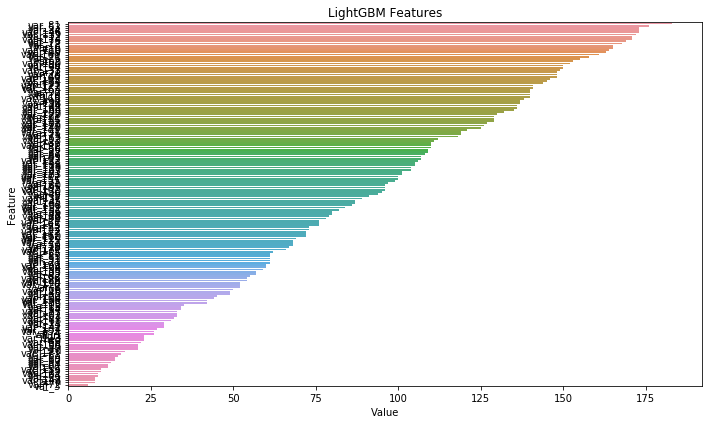

In [0]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=select_important_features.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [0]:
imp_feat_columns

array(['var_3', 'sum', 'var_143', 'var_72', 'var_59', 'var_84', 'var_181',
       'var_19', 'var_159', 'var_62', 'var_64', 'var_57', 'var_60',
       'var_69', 'var_63', 'var_171', 'std', 'var_37', 'var_50',
       'var_138', 'med', 'var_113', 'var_68', 'kurt', 'var_4', 'var_152',
       'var_134', 'var_142', 'var_74', 'var_11', 'var_168', 'var_102',
       'var_77', 'var_97', 'var_187', 'var_54', 'var_15', 'var_105',
       'var_193', 'var_156', 'var_194', 'var_20', 'var_45', 'var_178',
       'var_116', 'var_66', 'var_8', 'var_144', 'var_88', 'var_196',
       'var_82', 'var_83', 'var_135', 'var_104', 'var_58', 'var_199',
       'var_23', 'var_31', 'var_51', 'var_85', 'var_55', 'var_175',
       'var_132', 'var_111', 'var_28', 'var_70', 'var_125', 'var_114',
       'var_150', 'var_167', 'var_112', 'var_43', 'var_151', 'var_195',
       'var_52', 'var_24', 'var_90', 'var_128', 'var_48', 'var_186',
       'var_131', 'var_119', 'var_106', 'var_145', 'var_35', 'var_137',
       'var_5', 

In [0]:
new_df = df[imp_feat_columns].copy()

In [0]:
df.shape

(200000, 41)

In [0]:
old_common_features = pd.read_csv("common_features.csv")

new_feat = feature_imp["Feature"].values

common_features = []
for i in old_common_features.top_feature:
  for j in new_feat:
    if i == j:
      common_features.append(i)

In [0]:
common_features

['var_6',
 'var_110',
 'var_53',
 'var_26',
 'var_22',
 'var_99',
 'var_2',
 'var_190',
 'var_133',
 'var_0',
 'var_1',
 'var_40',
 'var_184',
 'var_179',
 'var_78',
 'var_191',
 'var_94',
 'var_170',
 'var_67',
 'var_18',
 'var_173',
 'var_118',
 'var_164',
 'var_147',
 'var_91',
 'var_89',
 'var_95',
 'var_155',
 'var_35']

In [0]:
print(" Common features after LightGBM = ", len(common_features))

 Common features after LightGBM =  29


### Generate CSV for Test.csv for submission

In [0]:
test_data = test_df.iloc[:,1:]

In [0]:
add_feature(test_data, test_data.columns)

  * Loading new data metrics: 
done adding extra features


In [0]:
test_data = scaler.fit_transform(test_data)

In [0]:
pred = clf_lgb.predict(test_data)

In [0]:
gen_csv(test_id, pred, "submission for model 3 LigtGBM ")

          target
test_0  0.101045
test_1  0.291219
test_2  0.292791
test_3  0.144291
test_4  0.041417
-------------Done-----------------


### Got 0.89637 score on Kaggle on test.csv which is highest among all other models.
#### It is 0.3 to 0.4 higher that SVM,DNN solutions. 